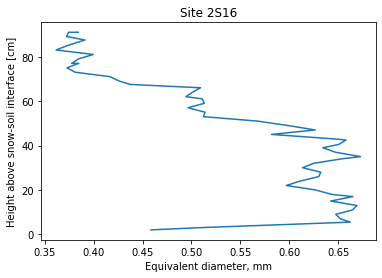

In [1]:
from read_CT_txt_files import read_CT_txt_files
import matplotlib.pyplot as plt

site='2S16'

data_dir='../data/microCT/' + site + '/' 

[SSA_CT,height_min,height_max]=read_CT_txt_files(data_dir)

fig,ax = plt.subplots()
ax.plot(6/917/SSA_CT*1000,height_min,label='microCT')        #CT data
ax.set_xlabel('Equivalent diameter, mm')
ax.set_ylabel('Height above snow-soil interface [cm]')

ax.set_title(f'Site {site.upper()}')
plt.show()

# Process all microCT and save the output.


This code begins by reading the CT data from every directory in ../data/microCT and processing it into a dataframe. 

It then stores these dataframes in a dictionary (key: site code, value: dataframe).

The dictionary is then saved as a pickle file in data/microCT.

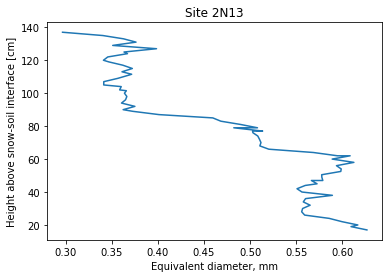

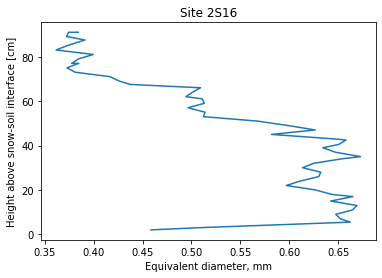

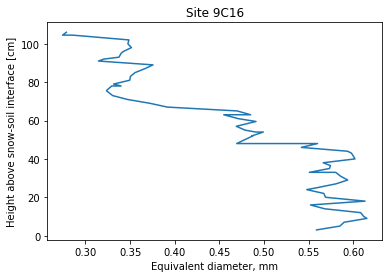

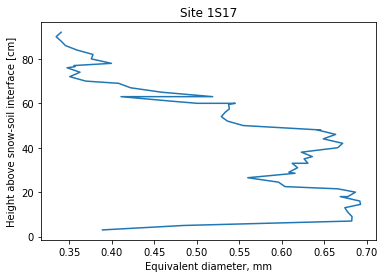

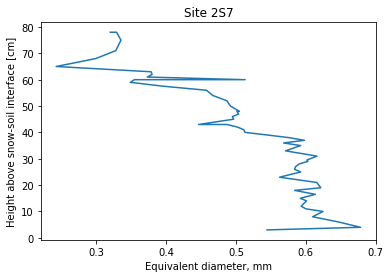

In [2]:
import os
import pandas as pd
import pickle

output_frames = {}


for site in os.listdir('../data/microCT'):
    
    if '.' not in site:

        data_dir='../data/microCT/' + site + '/' 

        [SSA_CT,height_min,height_max]=read_CT_txt_files(data_dir)

        fig,ax = plt.subplots()
        ax.plot(6/917/SSA_CT*1000,height_min,label='microCT')        #CT data
        ax.set_xlabel('Equivalent diameter, mm')
        ax.set_ylabel('Height above snow-soil interface [cm]')

        ax.set_title(f'Site {site.upper()}')
        plt.show()
        
        data_df = pd.DataFrame(
                                {'height (cm)':height_min,
                                 'SSA (m2/kg)':SSA_CT,
                                 'Equiv. Diam (mm)':6/917/SSA_CT*1000,
                                }
                              )
        
        output_frames[site] = data_df
        
pickle.dump(output_frames, open('../data/microCT/processed_mCT.p', 'wb'))

# Test that the saved data can be read out and plotted again

### The plots below should match the plots above!

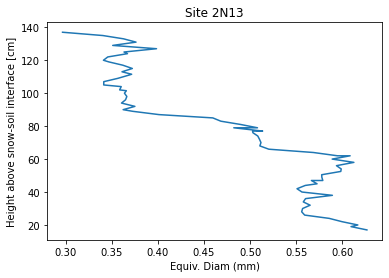

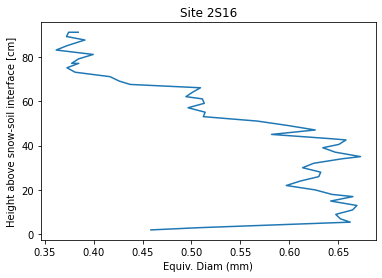

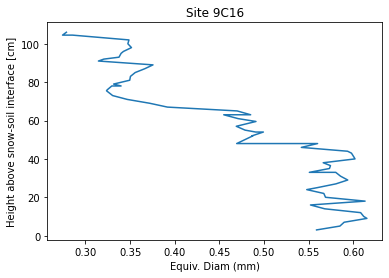

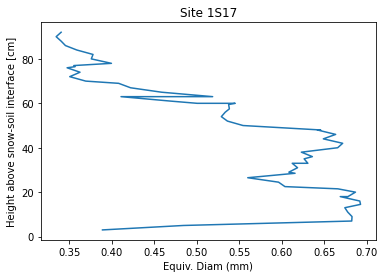

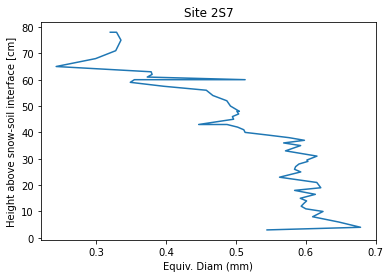

In [3]:
# read data from pickle file

frames = pickle.load(open('../data/microCT/processed_mCT.p', 'rb'))

for site in frames.keys():
    
    # extract dataframe from dict
    
    df = frames[site]
    
    # plot
    
    fig,ax = plt.subplots()
    ax.plot(df['Equiv. Diam (mm)'],
             df['height (cm)'])
    
    ax.set_xlabel('Equiv. Diam (mm)')
    ax.set_ylabel('Height above snow-soil interface [cm]')

    ax.set_title(f'Site {site.upper()}')
    
    plt.show()